# Taller gradiente descendente

## Nombre Michelle Y Brayan

In [11]:
# dependecias para todo el taller. No se deben agregar más dependecias
import numpy as np
import math
from matplotlib import pyplot as plt

Carga de datos base:

In [7]:
tam = 300
x = np.linspace(0,5,tam)
t = np.sin(2*np.pi*x)+np.random.normal(0,0.4,tam)

1- Muestre la señal $t$ en un gráfico.

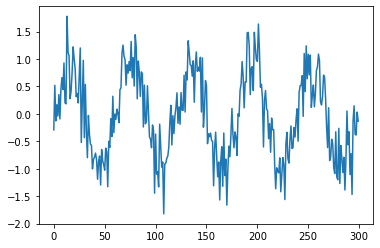

In [8]:
plt.plot(t)
plt.show()
plt.ion()

2- Usando mínimos cuadrados desarrolle para cada una de las tres de funciones base una solución que se ajuste a la señal mostrada en el punto anterior. Defina los valores de m y s en cada uno de los tres casos. Realice un gráfico comparativo para cada $\hat{t}$ vs t, y uno final de todas las $\hat{t}$s vs t. Muestré los errores de cada $\hat{t}$. Use subplot. ¿Que puede intepretar de los resultados? (1.2)

In [28]:
def generarPhi(x, m):
    s1 = 0.007
    s2 = 0.01
    val = np.arange(m)
    u=np.linspace(0,1,m)
    phi = np.ones((len(x), len(val)))
    phiPolinomial = np.ones((len(x), len(val)))
    phiExponencial = np.ones((len(x), len(val)))
    phiSigmoidal = np.ones((len(x), len(val)))
    for i in range(0, len(x), 1):
        for j in range(1, len(val), 1):
            phiPolinomial[i,j] = x[i]**val[j]
            phiExponencial[i, j] = math.exp(-(((x[i]-u[j])**2)/(2*s1**2)))
            a=(x[i]-u[j])/s2
            phiSigmoidal[i, j] = 1/(1+math.exp(-a))
     
    return phiPolinomial,phiExponencial,phiSigmoidal

def CalcularW(phi):
    t0=np.array(t)
    t1=t0.reshape(len(t0),1)
    return np.linalg.inv(phi.T@phi)@phi.T@t1

def errorCuadraticoMedio(phi,w):
    t0=np.array(t)
    t1=t0.reshape(len(t0),1)
    return np.mean(((phi@w)-t1)**2)

#Valores de M

m1=40


#Graficación------------------------------------------------

names=np.array(['M = '+str(m1),'M = '+str(m2),'M = '+str(m3)])
plt.ion()

#Calcular Predicción
phiPoli, phiExpo, phiSigmo = generarPhi(x, m1)

print(phiPoli)
print(phiExpo)
print(phiSigmo)

wPoli = CalcularW(phiPoli)
wExpo = CalcularW(phiExpo)
wSigmo = CalcularW(phiSigmo)


tpPoli=phiPoli@wPoli
tpExpo=phiExpo@wExpo
tpSigmo=phiSigmo@wSigmo


t0=np.arange(1,len(t)+1,1)
t1=t0.reshape(len(t0),1)

plt.subplots(2,2,figsize=(15,10))


plt.subplot(2,2,1)
plt.plot(t1,t,'r',t1,tpPoli,'b')
plt.legend(['Original',names[0]])
plt.xlabel("x")
plt.ylabel("t")
plt.title("Representacion de "+names[0]+" Sigmoidal, ECM: "+"{:.3f}".format(errorCuadraticoMedio(phiPoli,wPoli)))

plt.subplot(2,2,2)
plt.plot(t1,t,'r',t1,tpExpo,'b')
plt.legend(['Original',names[1]])
plt.xlabel("x")
plt.ylabel("t")
plt.title("Representacion de "+names[1]+" Sigmoidal, ECM: "+"{:.3f}".format(errorCuadraticoMedio(phiExpo,wExpo)))


plt.subplot(2,2,3)
plt.plot(t1,t,'r',t1,tpSigmo,'b')
plt.legend(['Original',names[2]])
plt.xlabel("x")
plt.ylabel("t")
plt.title("Representacion de "+names[2]+" Sigmoidal, ECM: "+"{:.3f}".format(errorCuadraticoMedio(phiSigmo,wSigmo)))


plt.subplot(2,2,4)
plt.plot(t1,t,'r')
plt.legend(['Error Cuadrático Medio'])
plt.xlabel("M")
plt.ylabel("error")
plt.title("Representacion de Error Cuadrático Medio")

plt.show()

[[ 1.00000000e+00  1.00000000e+00  1.00000000e+00 ...  1.00000000e+00
   1.00000000e+00  1.00000000e+00]
 [ 1.00000000e+00  2.00000000e+00  4.00000000e+00 ...  1.37438953e+11
   2.74877907e+11  5.49755814e+11]
 [ 1.00000000e+00  3.00000000e+00  9.00000000e+00 ...  4.50283906e+17
   1.35085172e+18  4.05255515e+18]
 ...
 [ 1.00000000e+00  2.98000000e+02  8.88040000e+04 ... -3.69310934e+18
   6.25806202e+18  1.78133033e+18]
 [ 1.00000000e+00  2.99000000e+02  8.94010000e+04 ... -4.85037363e+18
   7.03106699e+18 -6.39794240e+17]
 [ 1.00000000e+00  3.00000000e+02  9.00000000e+04 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.21627852e-12
  1.22012994e-03 1.00000000e+00]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [1.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e

LinAlgError: Singular matrix

3- Ahora programe una función para generar $w$ y $\hat{t}$ usando el algoritmo de gradiente descendente. Defina el caso de parada usando un error esperado y cantidad máxima de iteraciones (debe manejar ambos casos). Recuerde que la ecuación para calcular $w$ esta dada por:

$w_{j} = w_{j} - \alpha \Delta$

Retorne $w$, $\hat{t}$, el número de iteraciones y el error obtenido. (1.2). Una solución ideal no debe usar todas las iteraciones.

In [ ]:
def calcularWGradiente(phi):
    w=np.
    errActual=100
    errEsperado=0.0000001
    capAprendiaje=0.000002
    i=0;
    
    while(errEsperado<errorActual){
        
        i++;
    }
    

4- Usando las tres funciones base con los mismos $m$ obtenidos en el punto $2$, calcule $\hat{t}$ usando gradiente descendente y responda. 

¿Cuantas iteraciones tomó para el calculo de $w$?. 
¿Qué tan cerca quedo del $w$ generado con mínimos cuadrados?

Grafique los resultados obtenido realizando la comparación de t y $\hat{t}$. Muestre el número de interaciones, M y el error. (1.2)

5- Ahora haga el mismo ejercicio del punto 4 pero con $\phi$ normalizada. Compare las iteraciones, el error y $w$. Que puede intepretar de los resultados. (1.4)